In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


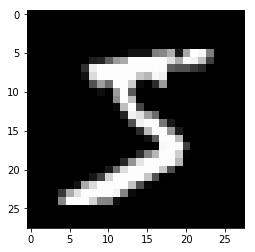

In [4]:
import matplotlib.pyplot as plt
im=plt.imshow(x_train[0],cmap="gray")
plt.show()

In [5]:
y_train[0]

5

In [6]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [7]:
print(x_train.shape)

(60000, 784)


In [8]:
#x_train[0]
x_train=x_train/255
x_test=x_test/255

In [9]:
x_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [10]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [11]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.], dtype=float32)

In [12]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


<img src="imgs/mnist1.png">

In [14]:
model.compile(optimizer=SGD(),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,batch_size=64,epochs=5,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 392us/step - loss: 0.7618 - acc: 0.8175 - val_loss: 0.3711 - val_acc: 0.9033
Epoch 2/5
60000/60000 [==============================] - 21s 345us/step - loss: 0.3387 - acc: 0.9067 - val_loss: 0.2915 - val_acc: 0.9206
Epoch 3/5
60000/60000 [==============================] - 22s 366us/step - loss: 0.2824 - acc: 0.9209 - val_loss: 0.2542 - val_acc: 0.9304
Epoch 4/5
60000/60000 [==============================] - 21s 358us/step - loss: 0.2491 - acc: 0.9301 - val_loss: 0.2292 - val_acc: 0.9351
Epoch 5/5
60000/60000 [==============================] - 20s 335us/step - loss: 0.2244 - acc: 0.9369 - val_loss: 0.2136 - val_acc: 0.9385


In [16]:
score=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 210us/step


In [17]:
print("LOSS:",score[0])
print("ACCU:",score[1])


LOSS: 0.213635327303
ACCU: 0.9385
